# NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
#from PIL import Image#for mask on wordcloud
%matplotlib inline
from re import split

# METHOD 1:INITIALISATION OF DATA init() 

In [2]:
def init():
    global df
    main_df = pd.read_excel('C:/Users/Asus/test/CLEANED_ONLINE_RETAIL.xlsx')#insert file path
    df=copy.deepcopy(main_df)

# METHOD 2:RELATION BETWEEN PRICE AND PURCHASE FREQUENCY relation()

In [3]:
def relation():
    #selection of data tuples greater than median on total amoungt purchased start#
    total_purchase=df[['StockCode','Quantity']]
    total_purchase=total_purchase.groupby('StockCode')
    total_purchase=total_purchase.sum()
    total_purchase=total_purchase.sort_values(by='Quantity',ascending=False)
    total_purchase=total_purchase[total_purchase.Quantity > total_purchase['Quantity'].median()]
    total_purchase=total_purchase.reset_index()
    #selection of data tuples greater than median on total amoungt purchased end#
    #selecting top 10 and least 10 sold products as per quantity sold
    most=total_purchase[:10]
    least=total_purchase[-10:]
    final=pd.merge(most,least,on='StockCode',how='outer')
    final=final['StockCode'].to_frame()
    #intersection to a single frame
    new=pd.merge(final,df,on='StockCode',how='inner')
    new=new[['StockCode','UnitPrice','Quantity']]
    new=new.groupby('StockCode')['UnitPrice'].value_counts().to_frame()
    new=new.rename(columns={'UnitPrice':'No of times Bought'})
    new=new.sort_index(ascending=True)
    new['Frequency']=new['No of times Bought']/373#total time period of consideration in days for quantity sold in a day,frequency of buying in days
    new=new.reset_index()
    for key,grp in new.groupby('StockCode'):
        grp.plot(kind='bar',y='Frequency',x='UnitPrice',label=key,figsize=(10,10))
        plt.xlabel("UnitPrice")
        plt.ylabel("Frequency")
        save=str(key+'.jpeg')
        plt.savefig(save)

# CALLING METHODS

In [4]:
init()

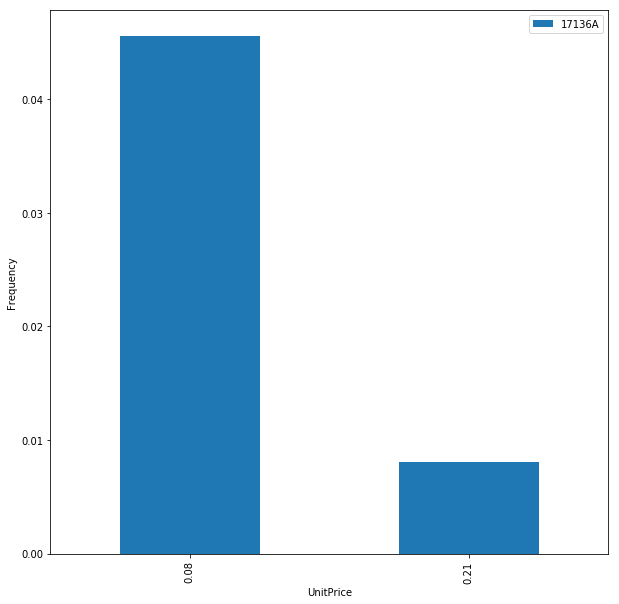

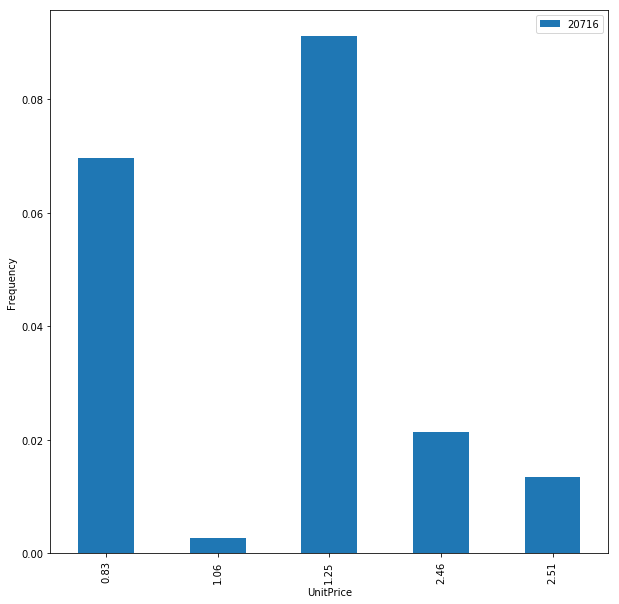

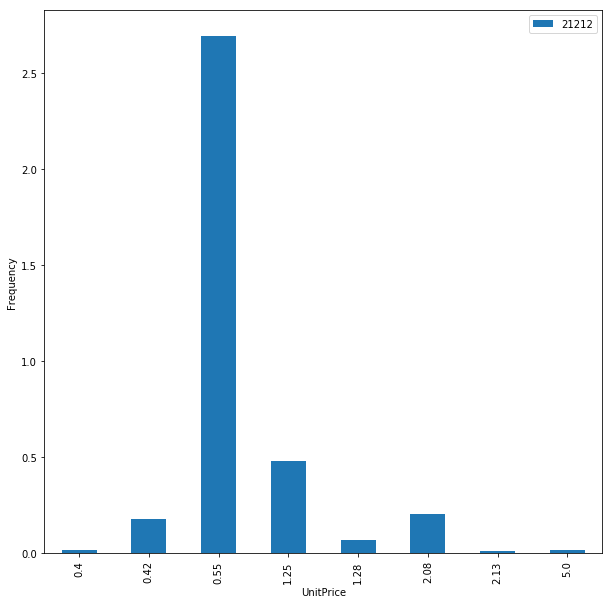

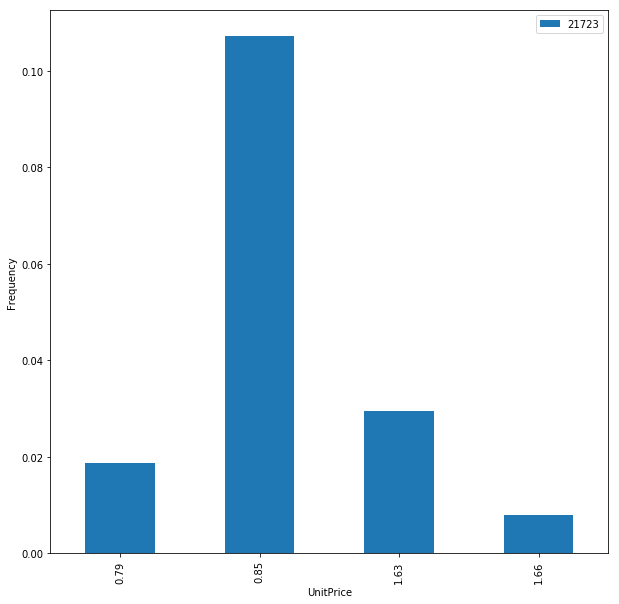

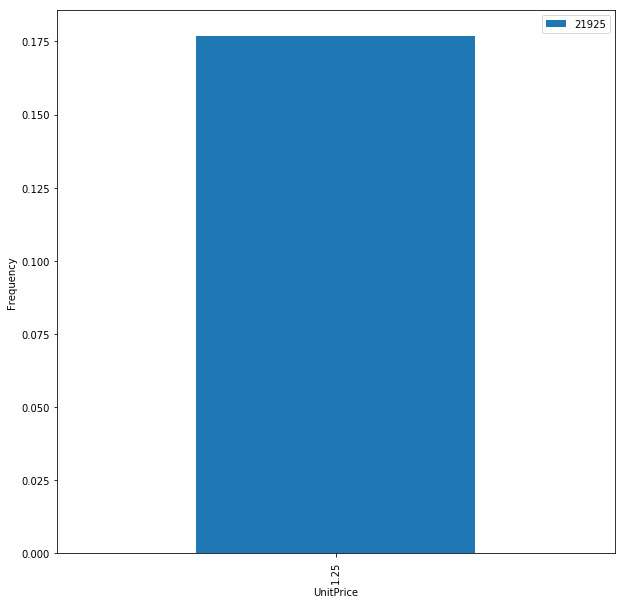

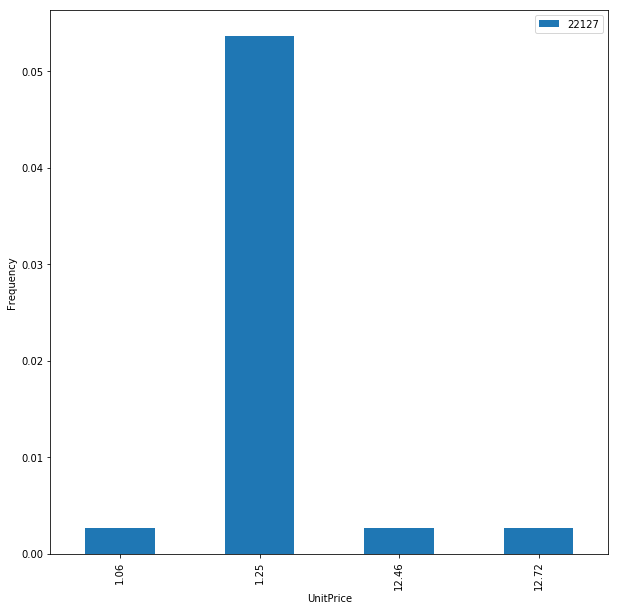

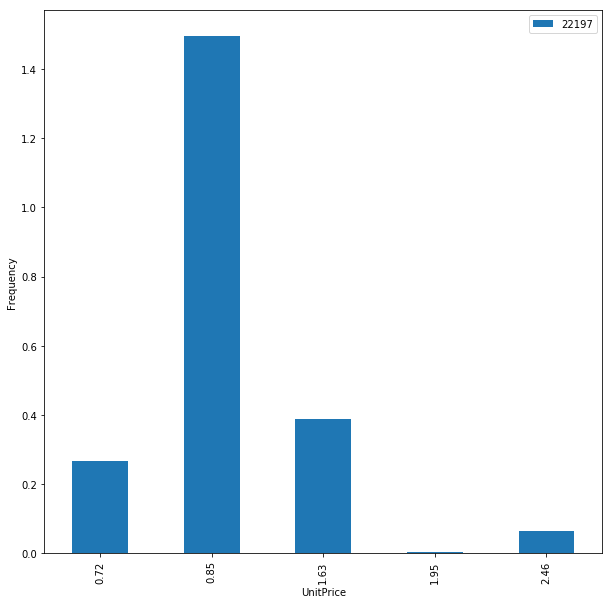

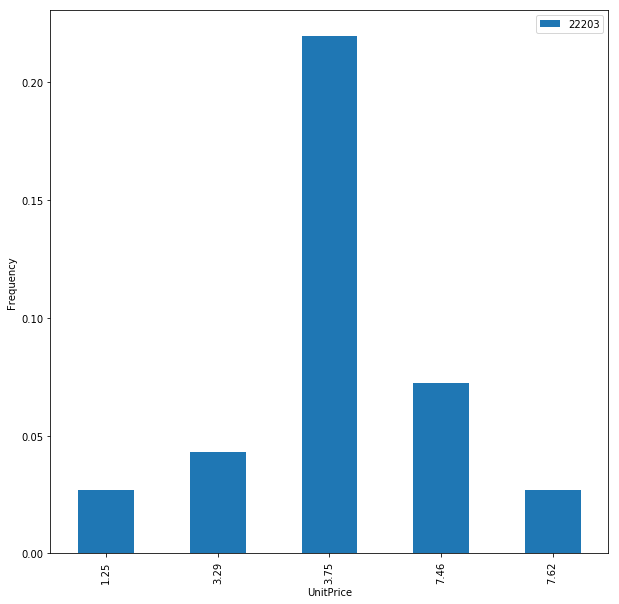

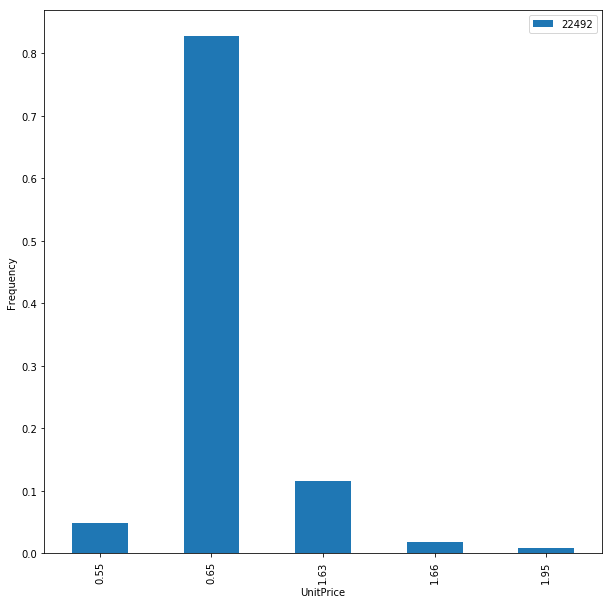

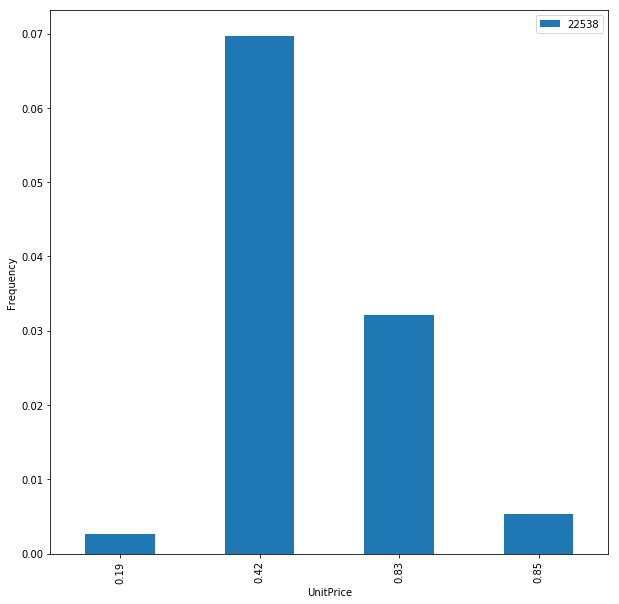

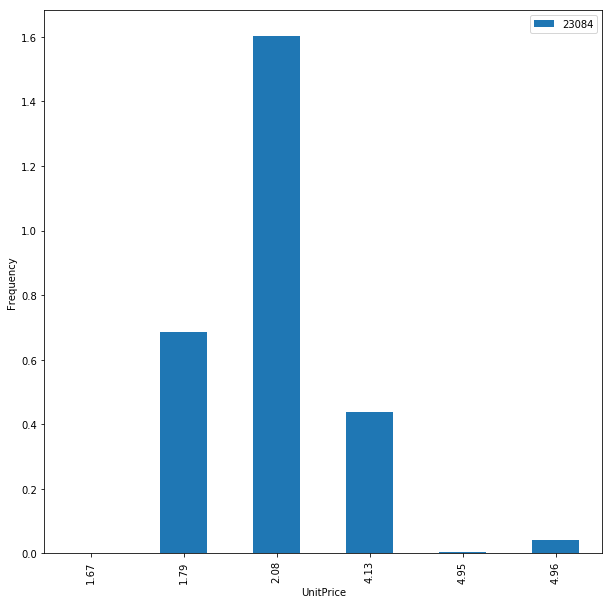

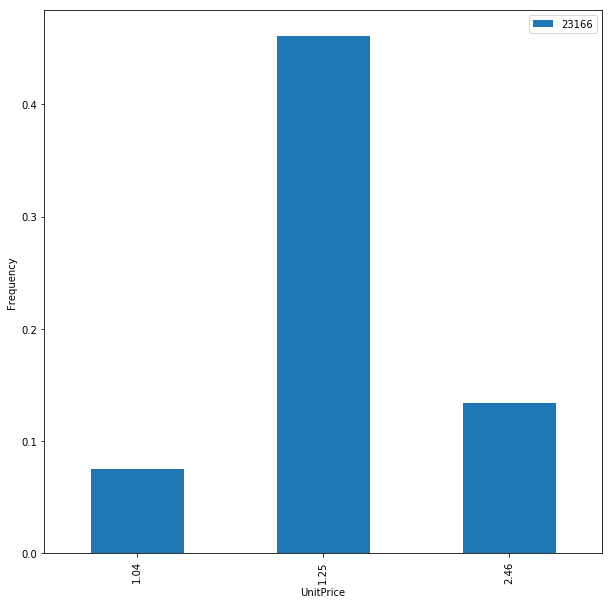

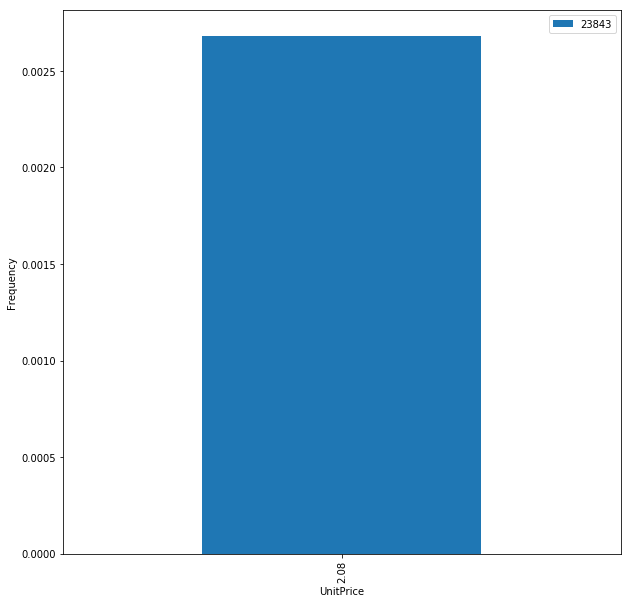

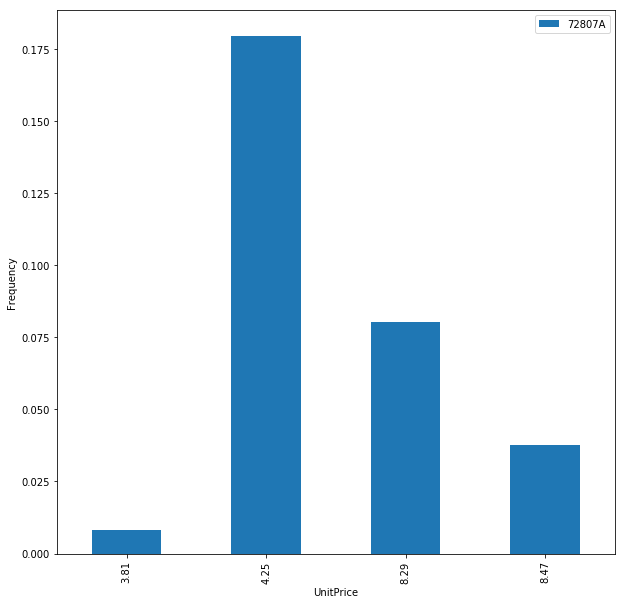

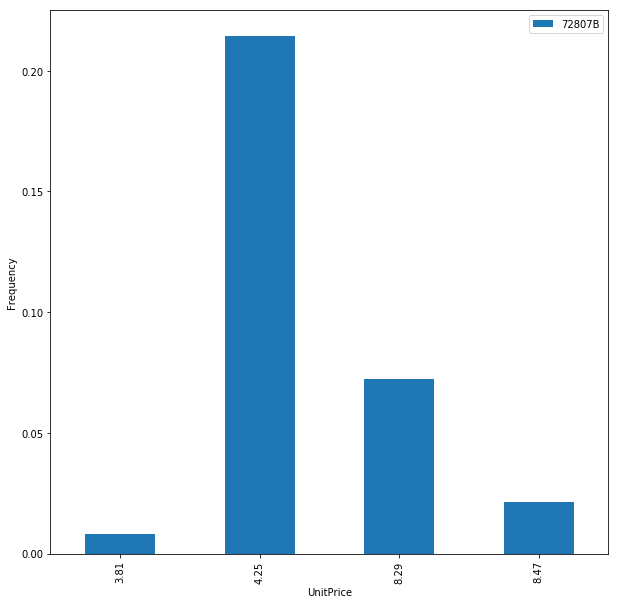

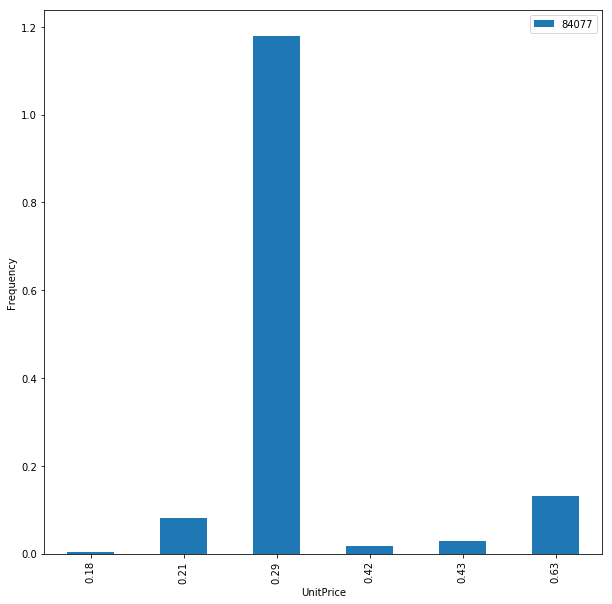

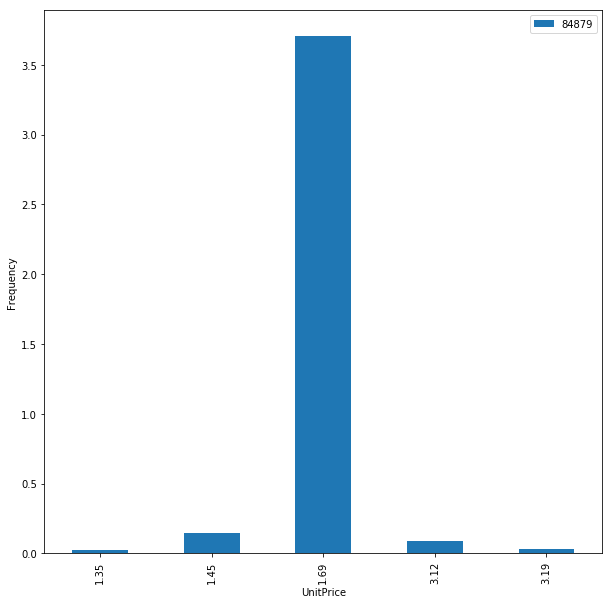

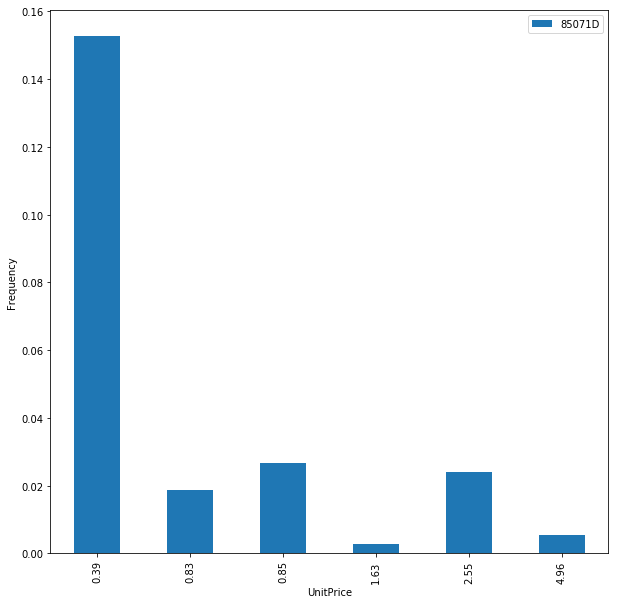

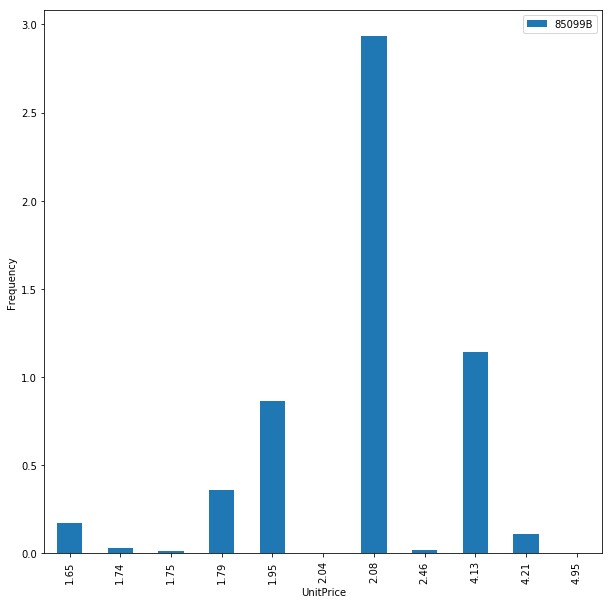

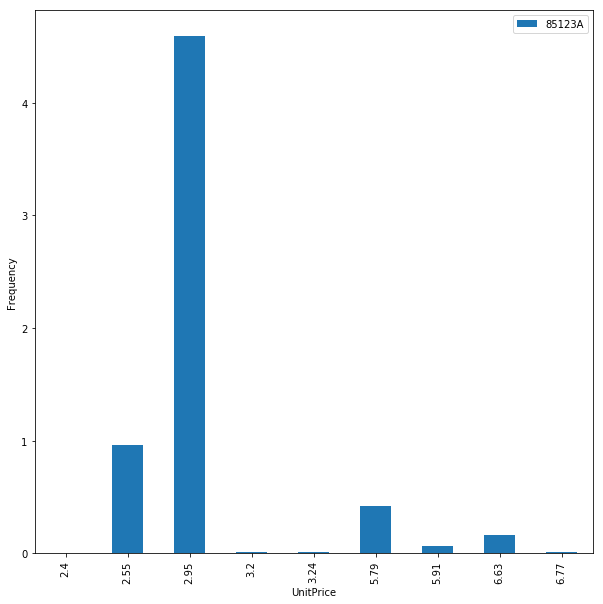

In [5]:
relation()